<a href="https://colab.research.google.com/github/Mishy34/Research/blob/main/Research_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
!pip install tensorflow keras numpy pandas scikit-learn librosa

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
import pandas as pd

#loading data
train_df = pd.read_csv('MainDataset.csv')
test_df = pd.read_csv('Test_Data.csv')

In [ ]:
print(train_df.head())
print(train_df.info())
print(train_df.describe())

   Sub_id  locJitter  abLocJitter  rapJitter  ppq5Jitter  ddpJitter  \
0       1      1.488     0.000090      0.900       0.794      2.699   
1       1      0.728     0.000038      0.353       0.376      1.059   
2       1      1.220     0.000074      0.732       0.670      2.196   
3       1      2.502     0.000123      1.156       1.634      3.469   
4       1      3.509     0.000167      1.715       1.539      5.145   

   locShimmer  dBLocShimmer  apq3Shimmer  apq5Shimmer  ...  maximumPitch  \
0       8.334         0.779        4.517        4.609  ...       187.576   
1       5.864         0.642        2.058        3.180  ...       234.505   
2       8.719         0.875        4.347        5.166  ...       211.442   
3      13.513         1.273        5.263        8.771  ...       220.230   
4       9.112         1.040        3.102        4.927  ...       225.162   

   numOfPulses  numOfPeriods  meanPeriod  StdDeviationOfPeriod  \
0          160           159    0.006065          

In [ ]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Sub_id                         0
locJitter                      0
abLocJitter                    0
rapJitter                      0
ppq5Jitter                     0
ddpJitter                      0
locShimmer                     0
dBLocShimmer                   0
apq3Shimmer                    0
apq5Shimmer                    0
apq11Shimmer                   0
ddaShimmer                     0
AC                             0
NTH                            0
HTN                            0
medianPitch                    0
meanPitch                      0
stdDeviation                   0
minimumPitch                   0
maximumPitch                   0
numOfPulses                    0
numOfPeriods                   0
meanPeriod                     0
StdDeviationOfPeriod           0
fractionOfLocUnvoicedFrames    0
numOfVoiceBreaks               0
degreeOfVoiceBreaks            0
UPDRS                          0
class                          0
dtype: int64
Sub_id                        

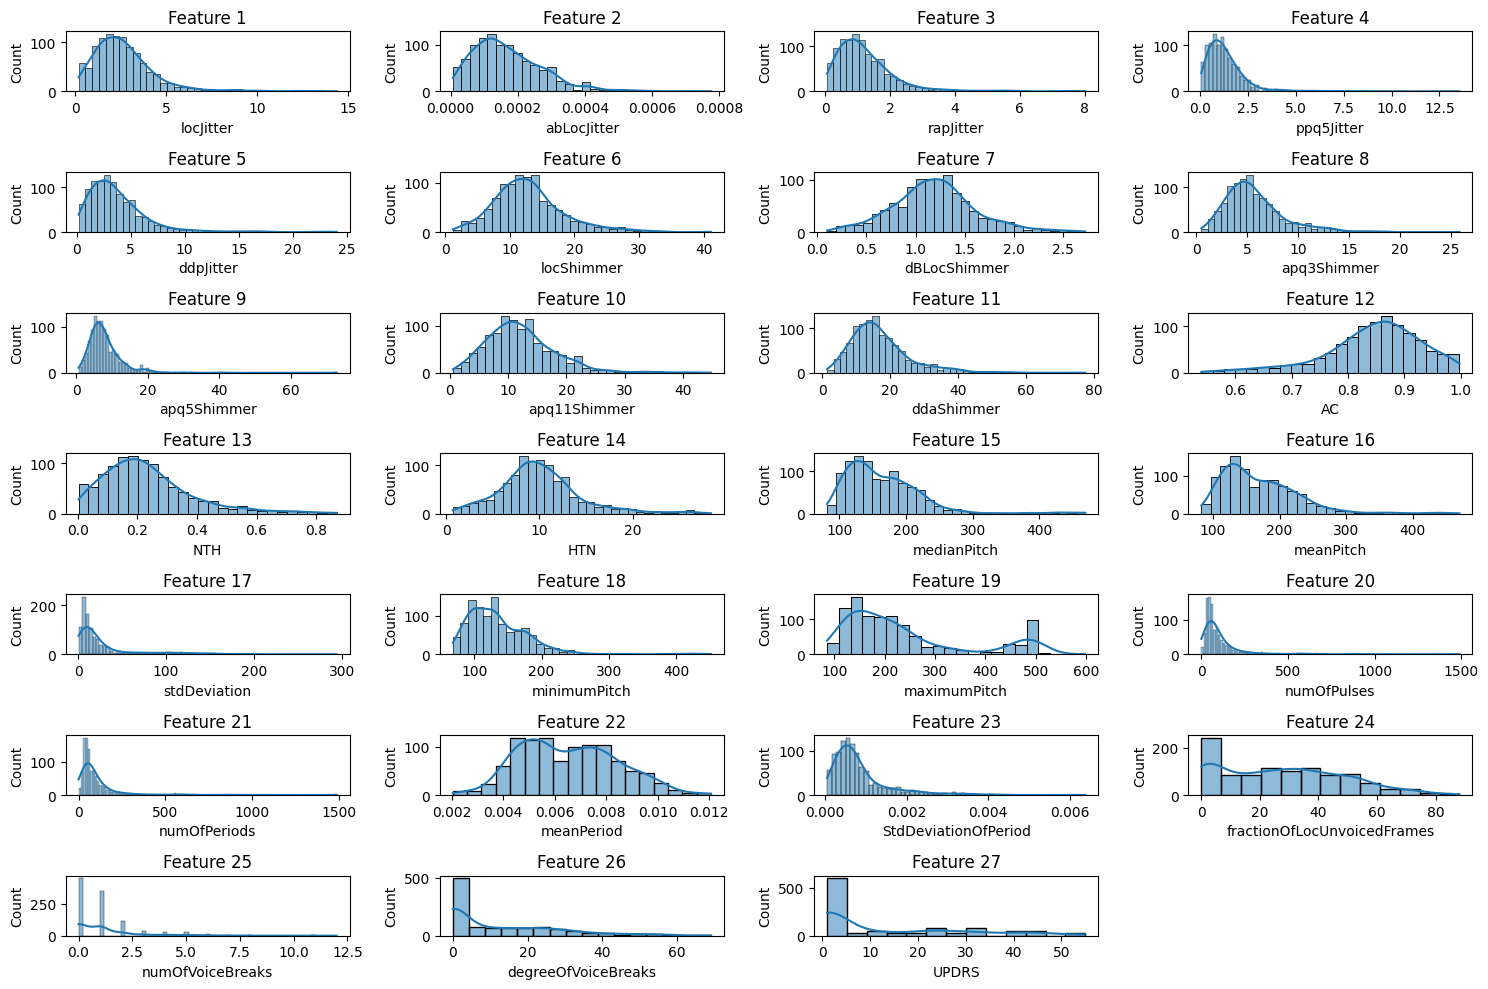

In [ ]:
# Histograms to visualize feature distributions
plt.figure(figsize=(15, 10))
for i in range(1, 28):
    plt.subplot(7, 4, i)
    sns.histplot(train_df.iloc[:, i], kde=True)
    plt.title(f"Feature {i}")
plt.tight_layout()
plt.show()

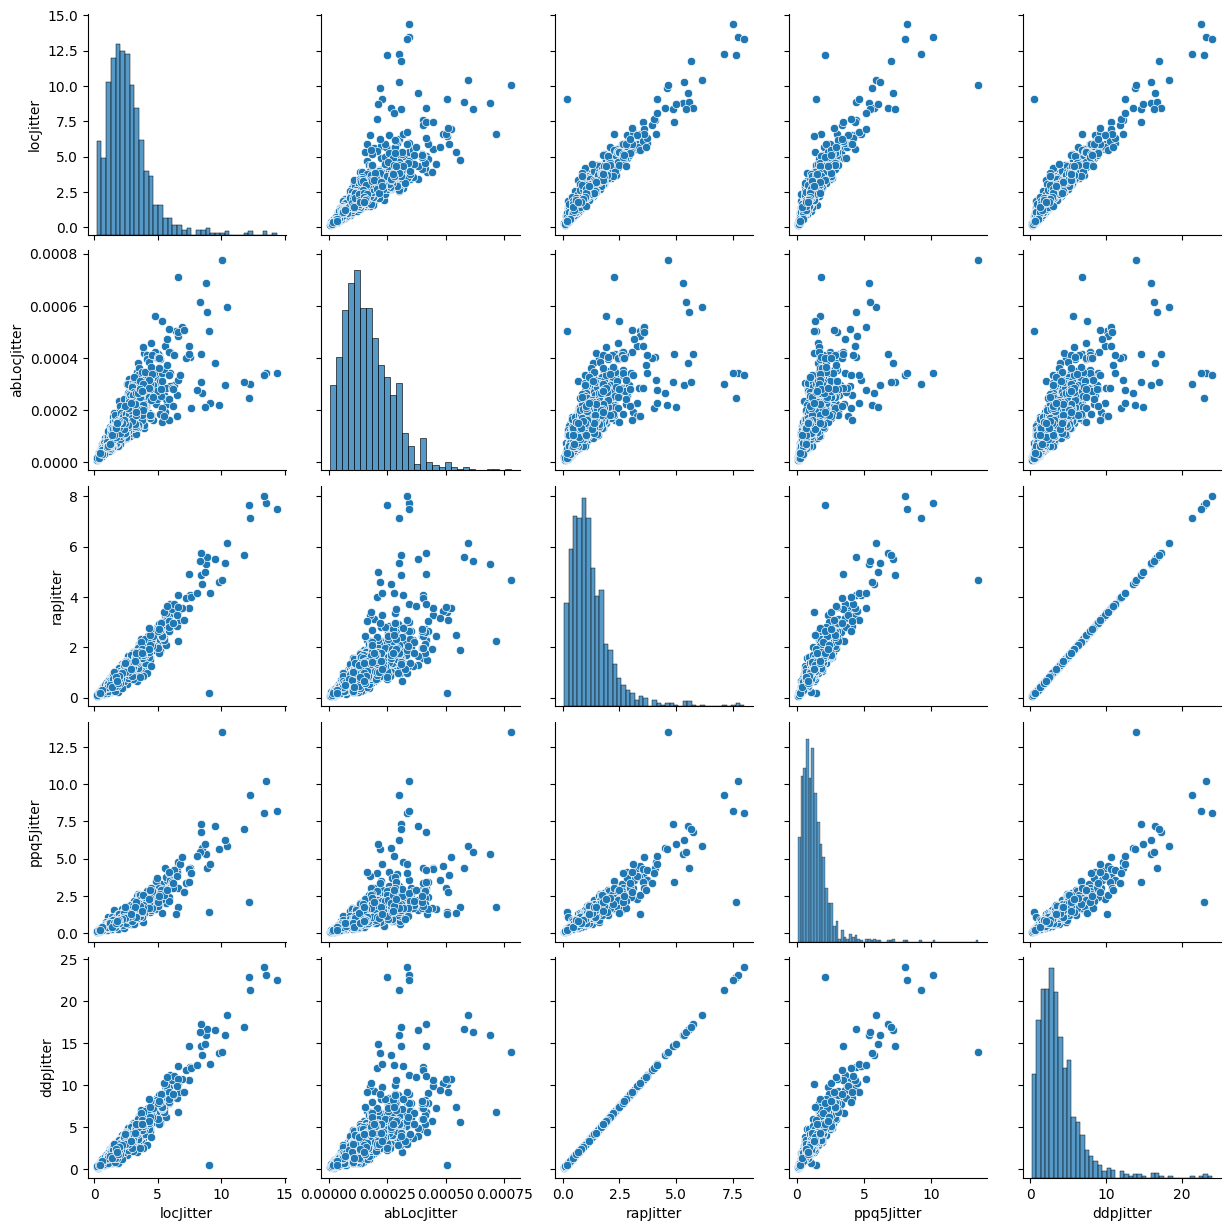

In [ ]:
# Select a subset of features for better visualization (e.g., first 5 features)
sns.pairplot(train_df.iloc[:, 1:6])
plt.show()

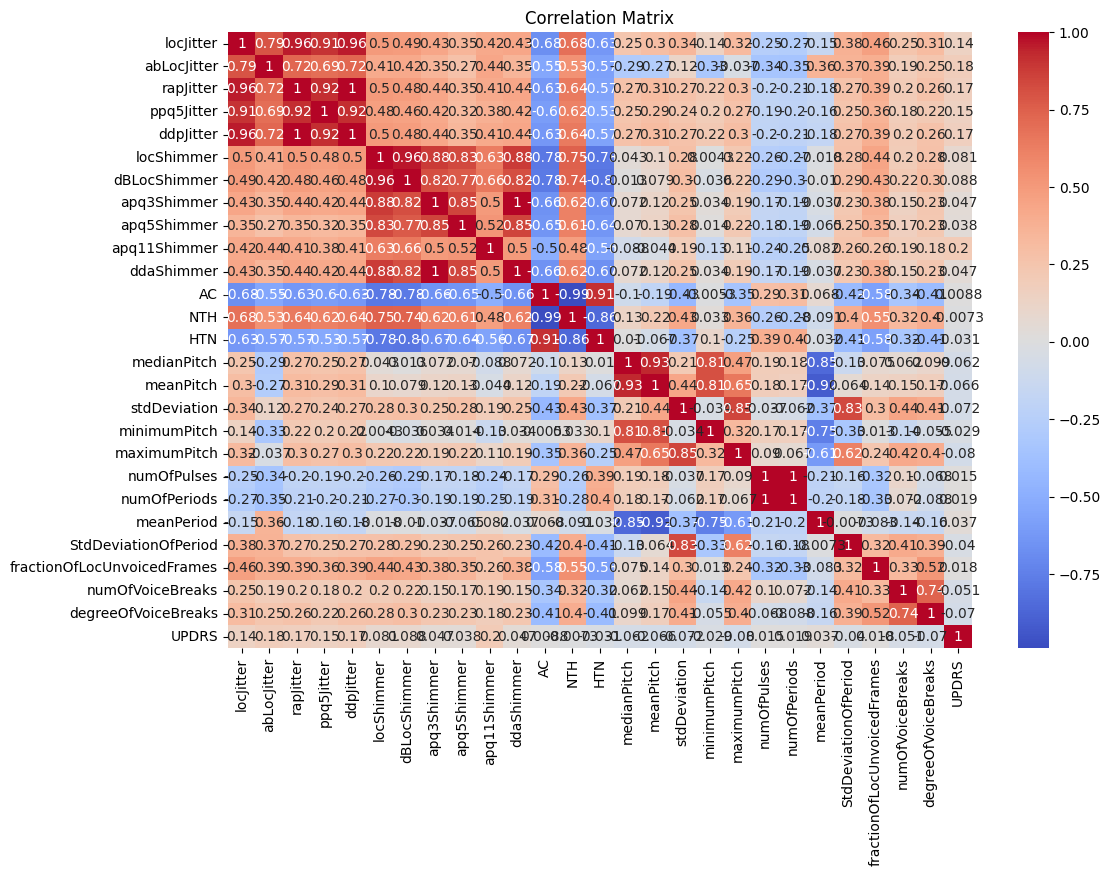

In [ ]:
# Calculate correlation matrix
correlation_matrix = train_df.iloc[:, 1:28].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Separate features and target variable
X = train_df.iloc[:, 1:28]  # Features (all columns except Subject ID, UPDRS, and class)
y = train_df["UPDRS"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)

In [ ]:
train_df['Jitter_Shimmer_Ratio'] = train_df['locJitter'] / train_df['locShimmer']

In [ ]:
# Separate features and target variable (Including new)
X = train_df.iloc[:, 1:29]  # Features (all columns except Subject ID, UPDRS, and class)
y = train_df["UPDRS"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

In [ ]:
estimators = [
    ('rf', RandomForestRegressor()),
    ('knn', KNeighborsRegressor())
]

In [ ]:
voting_model = VotingRegressor(estimators=estimators)

In [ ]:
grid_search = GridSearchCV(estimator=voting_model,
                          param_grid={'rf__n_estimators': rf_params['n_estimators'],
                                     'rf__max_depth': rf_params['max_depth'],
                                     'rf__min_samples_split': rf_params['min_samples_split'],
                                     'knn__n_neighbors': knn_params['n_neighbors'],
                                     'knn__weights': knn_params['weights']},
                          cv=5,
                          scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found by grid search:", grid_search.best_params_)

Best parameters found by grid search: {'knn__n_neighbors': 3, 'knn__weights': 'distance', 'rf__max_depth': 10, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}


In [ ]:
best_voting_model = grid_search.best_estimator_
y_pred_best_voting = best_voting_model.predict(X_test_scaled)
mse_best_voting = mean_squared_error(y_test, y_pred_best_voting)
print(f"Best Voting Ensemble MSE: {mse_best_voting}")

Best Voting Ensemble MSE: 3.9431966588988647


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [ ]:
# Define weights for each model (optional)
weights = [0.8, 0.2]  # Example: Give more weight to Random Forest

# Create VotingRegressor
voting_model = VotingRegressor(estimators=[('rf', rf_model), ('knn', knn_model)], weights=weights)
voting_model.fit(X_train_scaled, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                            ('knn', KNeighborsRegressor())],
                weights=[0.8, 0.2])

In [ ]:
# Predict on test data
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_voting = voting_model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_voting = mean_squared_error(y_test, y_pred_voting)

print(f"Random Forest MSE: {mse_rf}")
print(f"KNN MSE: {mse_knn}")
print(f"Voting Ensemble MSE: {mse_voting}")

Random Forest MSE: 0.00043317307692307915
KNN MSE: 17.11807692307692
Voting Ensemble MSE: 0.6830033846153843
